# 1.

### GEM

In [1]:
A=[[0.05,0.07,0.06,0.05], [0.07,0.10,0.08,0.07], [0.06,0.08,0.10,0.09], [0.05,0.07,0.09,0.10]]
b=[0.23,0.32,0.33,0.31]

In [2]:
def GEM(H,b):
    n=len(b)
    for index in range(0, n): 
    ## i means the row in matrix (begening at 1) while index means the index in array (begening at 0)
    ## So I write 'index' in complete for distinguishment and also 'jndex'
        temp = H[index][index]
        if temp == 0:
            break
            print("ERROR!!!")
            
        for jndex in range(index, n):
            H[index][jndex] *= 1/temp
        b[index] *= 1/temp
        ## normalized the row of H[index] and b[index]
        
        for index1 in range(index+1, n):
            if index1 == index:
                continue
            temp1 = H[index1][index]
            k=H[index1][index]/H[index][index]
            
            for jndex1 in range(index, n):
                H[index1][jndex1] -= H[index][jndex1]*k
            b[index1] -= b[index]*k
            
    return H,b
    ## having transformed H into an upper triangle matrix
    
def back_substitution(H,b):
    x=[0 for i in range(len(b))]
    n=len(b)
    for index in range(n-1,-1,-1):
        if H[index][index]==0:
            print("ERROR!!!")
        x[index]=b[index]
        
        for jndex in range(n-1, index, -1):
            x[index] -= H[index][jndex]*x[jndex]
        x[index]/=H[index][index]
    
    return x

A1,b1=GEM(A,b)
x=back_substitution(A1,b1)

#for i in range(len(b)):
#    x[i]=round(x[i],2)

print("The solution is x1=%f, x2=%f, x3=%f, x4=%f"%(x[0],x[1],x[2],x[3]))

The solution is x1=1.000000, x2=1.000000, x3=1.000000, x4=1.000000


### Cholesky

In [3]:
A=[[0.05,0.07,0.06,0.05], [0.07,0.10,0.08,0.07], [0.06,0.08,0.10,0.09], [0.05,0.07,0.09,0.10]]
b=[0.23,0.32,0.33,0.31]

In [4]:
from numpy import sqrt

def Cholesky(A):
    n=len(A)
    H=[[0 for i in range(n)] for j in range(n)]
    for jndex in range(0,n):
        for kndex in range(0,jndex,1):
            A[jndex][jndex] -= A[jndex][kndex]**2
        
        A[jndex][jndex]=sqrt(A[jndex][jndex])
        H[jndex][jndex]=A[jndex][jndex]
        
        for index in range(jndex+1, n):
            for kndex in range(0,jndex,1):
                A[index][jndex] -= A[index][kndex]*A[jndex][kndex]
                
            A[index][jndex] /= A[jndex][jndex]
            H[jndex][index]=A[index][jndex]
            
    return H
    ## H is upper left triangle matrix, and A=H^{\dagger}H

def back_substitution(H,b):
    x=[0 for i in range(len(b))]
    n=len(b)
    for index in range(n-1,-1,-1):
        if H[index][index]==0:
            print("ERROR!!!")
        x[index]=b[index]
        
        for jndex in range(n-1, index, -1):
            x[index] -= H[index][jndex]*x[jndex]
        x[index]/=H[index][index]
    
    return x

def forward_substitution(H,b):
    x=[0 for i in range(len(b))]
    n=len(b)
    for index in range(0,n):
        if H[index][index]==0:
            print("ERROR!!!")
        x[index]=b[index]
        
        for jndex in range(0,index):
            x[index] -= H[index][jndex]*x[jndex]
            
        x[index]/=H[index][index]
    
    return x

H=Cholesky(A)
H_dagger=[[H[j][i] for j in range(len(b))] for i in range(len(b))]
y=forward_substitution(H_dagger,b)
x=back_substitution(H,y)
#for i in range(n):
#    x[i]=round(x[i],2)

print("The solution is x1=%f, x2=%f, x3=%f, x4=%f"%(x[0],x[1],x[2],x[3]))
print("The upper triangle matrix is:")

The solution is x1=1.000000, x2=1.000000, x3=1.000000, x4=1.000000
The upper triangle matrix is:


# 3. 
## (a)

In [5]:
def f(x):
    return 1/(1+25*x*x)

def Lagrangian(m, x): ## use m[i] for lagrangian fit to predict the value at x point
    Px=0
    Lj=[1 for i in range(len(m))]
    
    for i in range(len(m)):
        
        for j in range(len(m)):
            if j==i: continue
            Lj[i]*=(x-m[j])/(m[i]-m[j])
        
        Px += f(m[i])*Lj[i]
    
    return Px


m=[-1+i/10 for i in range(21)]
fm=[f(m[i]) for i in range(len(m))]
x=[-1+i/20 for i in range(41)]
fx=[f(x[i]) for i in range(len(x))]
mid=[(m[i]+m[i+1])/2 for i in range(len(m)-1)]
fmid=[f(mid[i]) for i in range(len(mid))]

for i in range(41):
    print("%d\t%.2f\t%f\t%f\t%f"%(i, x[i],f(x[i]),Lagrangian(m,x[i]),abs(f(x[i])-Lagrangian(m,x[i])) ))

0	-1.00	0.038462	0.038462	0.000000
1	-0.95	0.042440	-39.952449	39.994889
2	-0.90	0.047059	0.047059	0.000000
3	-0.85	0.052459	3.454958	3.402499
4	-0.80	0.058824	0.058824	0.000000
5	-0.75	0.066390	-0.447052	0.513442
6	-0.70	0.075472	0.075472	0.000000
7	-0.65	0.086486	0.202423	0.115936
8	-0.60	0.100000	0.100000	0.000000
9	-0.55	0.116788	0.080660	0.036128
10	-0.50	0.137931	0.137931	0.000000
11	-0.45	0.164948	0.179763	0.014814
12	-0.40	0.200000	0.200000	0.000000
13	-0.35	0.246154	0.238446	0.007708
14	-0.30	0.307692	0.307692	0.000000
15	-0.25	0.390244	0.395093	0.004849
16	-0.20	0.500000	0.500000	0.000000
17	-0.15	0.640000	0.636755	0.003245
18	-0.10	0.800000	0.800000	0.000000
19	-0.05	0.941176	0.942490	0.001314
20	0.00	1.000000	1.000000	0.000000
21	0.05	0.941176	0.942490	0.001314
22	0.10	0.800000	0.800000	0.000000
23	0.15	0.640000	0.636755	0.003245
24	0.20	0.500000	0.500000	0.000000
25	0.25	0.390244	0.395093	0.004849
26	0.30	0.307692	0.307692	0.000000
27	0.35	0.246154	0.238446	0.007708
28	0.4

### Plot here, so please allow me to import numpy and other modules for plotting

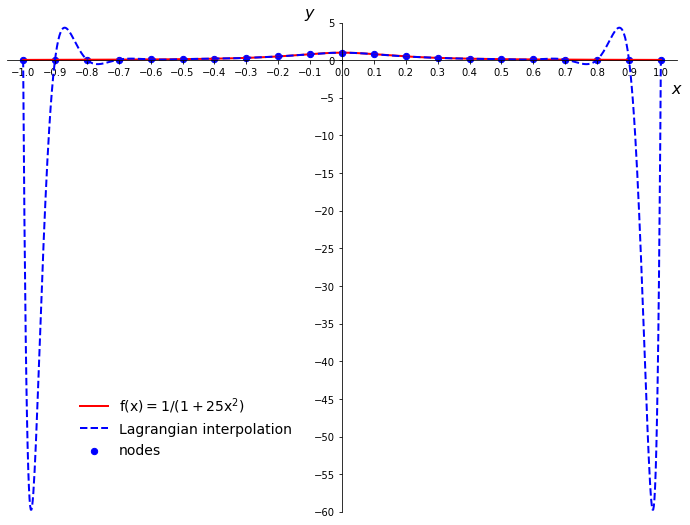

In [6]:
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(-1,1,1000)

plt.figure(figsize=(12,9))
plt.plot(x_range, f(x_range), color='red', linewidth=2.0,linestyle='solid', label=r'$\rm f(x)=1/(1+25x^2)$')
plt.plot(x_range, Lagrangian(m,x_range), color='blue',linewidth=2.0,linestyle='dashed', label=r'Lagrangian interpolation')
plt.scatter(m,fm,s=40,marker='o',color='blue', label='nodes')


x_ticks=linspace(-1.0,1.0,21)
y_ticks=linspace(-65,5,15)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.legend(loc=(0.1,0.1), frameon=False, fontsize=14)
plt.ylim(-60,5)
plt.xlim(-1.05,1.05)
ax=plt.gca()
ax.set_xlabel(r'$x$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$y$', fontsize=16,x=1,y=1,rotation=0)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')

#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)

plt.savefig('HW2-3(a).pdf')
plt.show()

## (b)

In [7]:
from numpy import cos
from numpy import pi

def Chebyshev(n,x): ## the value of n-order Chebyshev function at x point, also T_n(x)
    Tn=[1 for i in range(n+1)]
    if n==0: result=Tn[0]
    if n>0: 
        Tn[1]=x
        for i in range(2,n+1):
            Tn[i]=2*x*Tn[i-1]-Tn[i-2]
            
    result=Tn[n]
    return result

def Chebyshev0point(N,k): ## k=0, 1, 2, ......, N-1
    return cos(pi*(k+1/2)/20)

def c(N,m):
    result = 0

    for k in range(0, N):
        result += Chebyshev(m, Chebyshev0point(N,k))*f(Chebyshev0point(N,k))
        
    if m==0: result=result/N
    else: result=2*result/N
    return result

def Chebyshev_fit(N,x):
    result = 0
    for m in range(N):
        result += c(N,m)*Chebyshev(m,x)
    return result

    
m=[Chebyshev0point(20, k) for k in range(20)]
fm=[f(m[i]) for i in range(len(m))]
x=[0 for i in range(39)]
for i in range(20):
    x[2*i]=m[i]
for i in range(19):
    x[2*i+1]=(x[2*i]+x[2*i+2])/2


for i in range(39):
    print("%d\t%.2f\t%f\t%f\t%f"%(i,x[i],f(x[i]),Chebyshev_fit(20,x[i]),abs(f(x[i])-Chebyshev_fit(20,x[i]))))

0	1.00	0.038691	0.038691	0.000000
1	0.98	0.039623	0.041012	0.001390
2	0.97	0.040588	0.040588	0.000000
3	0.95	0.042601	0.041028	0.001573
4	0.92	0.044765	0.044765	0.000000
5	0.89	0.048251	0.050051	0.001801
6	0.85	0.052152	0.052152	0.000000
7	0.81	0.057931	0.055761	0.002170
8	0.76	0.064702	0.064702	0.000000
9	0.70	0.074499	0.077294	0.002795
10	0.65	0.086621	0.086621	0.000000
11	0.59	0.104339	0.100421	0.003918
12	0.52	0.127794	0.127794	0.000000
13	0.45	0.163373	0.169511	0.006138
14	0.38	0.214539	0.214539	0.000000
15	0.31	0.296508	0.285364	0.011144
16	0.23	0.423295	0.423295	0.000000
17	0.16	0.621880	0.645255	0.023376
18	0.08	0.866629	0.866629	0.000000
19	0.00	1.000000	0.962410	0.037590
20	-0.08	0.866629	0.866629	0.000000
21	-0.16	0.621880	0.645255	0.023376
22	-0.23	0.423295	0.423295	0.000000
23	-0.31	0.296508	0.285364	0.011144
24	-0.38	0.214539	0.214539	0.000000
25	-0.45	0.163373	0.169511	0.006138
26	-0.52	0.127794	0.127794	0.000000
27	-0.59	0.104339	0.100421	0.003918
28	-0.65	0.086621	0.08

### Plot here, so please allow me to import numpy and other modules for plotting

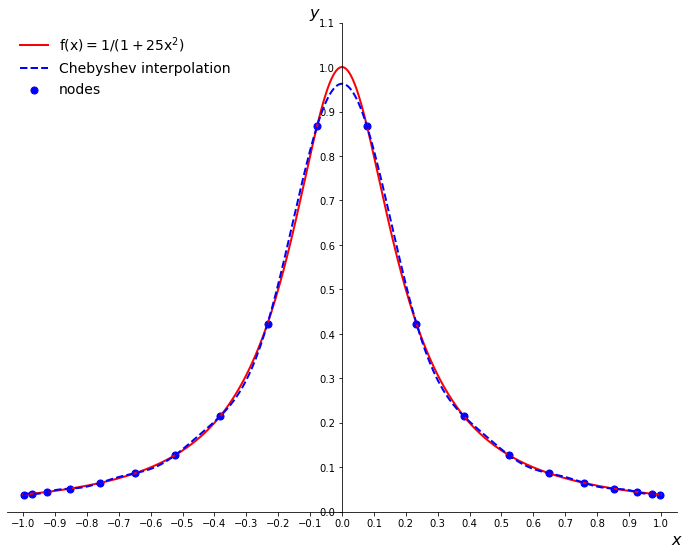

In [8]:
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(-1,1,1000)

plt.figure(figsize=(12,9))
plt.plot(x_range, f(x_range), color='red', linewidth=2.0,linestyle='solid', label=r'$\rm f(x)=1/(1+25x^2)$')
plt.plot(x_range, Chebyshev_fit(20,x_range), color='blue',linewidth=2.0,linestyle='dashed', label=r'Chebyshev interpolation')
plt.scatter(m,fm,s=50,marker='o',color='blue', label='nodes')

plt.ylim(0,1.1)

x_ticks=linspace(-1,1,21)
y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.legend(loc='upper left', frameon=False, fontsize=14)
plt.xlim(-1.05,1.05)
ax=plt.gca()
ax.set_xlabel(r'$x$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$y$', fontsize=16,x=1,y=1,rotation=0)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')

#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)

plt.savefig('HW2-3(b).pdf')
plt.show()

# (c)

In [9]:
def tridiagonalmatrix(A,l): ## to solve x for Ax=l
    n=len(A)
    a=[A[i][i] for i in range(n)]
    alpha=[a[i] for i in range(n)]
    beta=[A[i+1][i] for i in range(n-1)]
    b=[A[i+1][i] for i in range(n-1)]
    c=[A[i][i+1] for i in range(n-1)]
    L=[[0 for i in range(n)] for i in range(n)]
    U=[[0 for i in range(n)] for i in range(n)]
    x=[0 for i in range(n)]
    y=[0 for i in range(n)]
    
    for i in range(0,n-1):
        beta[i]=b[i]/alpha[i]
        alpha[i+1]=a[i+1] - beta[i]*c[i]
    
    for i in range(n):
        for j in range(n):
            if i==j: 
                L[i][j]=1
                U[i][j]=alpha[i]
            elif i==j+1: L[i][j]=beta[j]
            elif j==i+1: U[i][j]=c[i]
            else: 
                L[i][j]=0
                U[i][j]=0
    
    y[0]=l[0]
    for i in range(1,n):
        y[i]=l[i] - y[i-1]*beta[i-1]
                
    x[n-1]=y[n-1]/alpha[n-1]
    for i in range(n-2,-1,-1):
        x[i]=(y[i] - c[i]*x[i+1])/alpha[i]
    
    return x


def CubicSplineInterpolation(x, y):
    n=len(x)-1
    M=[0 for i in range(n+1)]
    A=[0 for i in range(n)]
    B=[0 for i in range(n)]
    h=[x[i+1] - x[i] for i in range(n)]
    d=[0 for i in range(n+1)]
    for i in range(1,n):
        d[i]=6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
        
    H=[[0 for i in range(n+1)] for i in range(n+1)]
    H[0][0]=1
    H[n][n]=1
    # We choose m_0=0, m_n=0
    for i in range(1,n):
        for j in range(0, n+1):
            if j==i-1:    H[i][j]=h[j]
            if j==i:      H[i][j]=2*(h[j-1]+h[j])
            if j==i+1:    H[i][j]=h[i]
    
    M=tridiagonalmatrix(H,d)
    
    for i in range(0,n):
        A[i]=(y[i+1] - y[i])/h[i] - h[i]/6*(M[i+1] - M[i])
        B[i]=y[i] - M[i]*(h[i]**2)/6
    return M, A, B


def cubic_predict(m, x):
    h=[m[i+1]-m[i] for i in range(len(m)-1)]
    fm=[f(m[i]) for i in range(len(m))]
    M, A, B=CubicSplineInterpolation(m, fm)
    j=int((x-m[0])*len(h)/2)
    if j==len(m)-1: j-=1
    prediction = -M[j]/6/h[j]*((x-m[j+1])**3) + M[j+1]/6/h[j]*((x-m[j])**3) + A[j]*(x-m[j]) + B[j]
    return prediction
    
    
m=[-1+i/10 for i in range(21)]
fm=[f(m[i]) for i in range(len(m))]
x=[-1+i/20 for i in range(41)]


for i in range(41):
    print("%d\t%.2f\t%f\t%f\t%f"%(i,x[i],f(x[i]),cubic_predict(m, x[i]),abs(f(x[i])-cubic_predict(m, x[i]))))

0	-1.00	0.038462	0.038462	0.000000
1	-0.95	0.042440	0.042534	0.000094
2	-0.90	0.047059	0.047059	0.000000
3	-0.85	0.052459	0.052431	0.000028
4	-0.80	0.058824	0.058824	0.000000
5	-0.75	0.066390	0.066394	0.000004
6	-0.70	0.075472	0.075472	0.000000
7	-0.65	0.086486	0.086474	0.000013
8	-0.60	0.100000	0.100000	0.000000
9	-0.55	0.116788	0.116787	0.000001
10	-0.50	0.137931	0.137931	0.000000
11	-0.45	0.164948	0.164865	0.000084
12	-0.40	0.200000	0.200000	0.000000
13	-0.35	0.246154	0.246268	0.000114
14	-0.30	0.307692	0.307692	0.000000
15	-0.25	0.390244	0.389420	0.000824
16	-0.20	0.500000	0.500000	0.000000
17	-0.15	0.640000	0.643169	0.003169
18	-0.10	0.800000	0.800000	0.000000
19	-0.05	0.941176	0.938866	0.002310
20	0.00	1.000000	1.000000	0.000000
21	0.05	0.941176	0.938866	0.002310
22	0.10	0.800000	0.800000	0.000000
23	0.15	0.640000	0.643169	0.003169
24	0.20	0.500000	0.500000	0.000000
25	0.25	0.390244	0.389420	0.000824
26	0.30	0.307692	0.307692	0.000000
27	0.35	0.246154	0.246268	0.000114
28	0.40	0.

### Plot here, so please allow me to import numpy and other modules for plotting

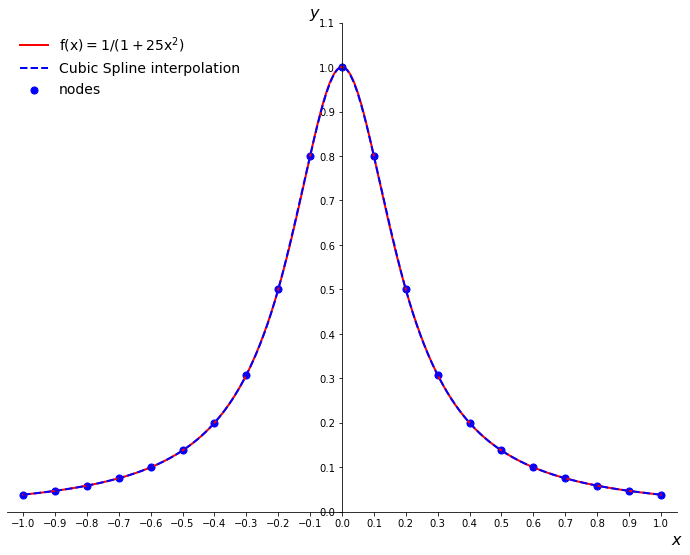

In [10]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(-1,1,1000)
y_predict=[cubic_predict(m,x_range[i]) for i in range(1000)]
y_predict=array(y_predict)
plt.figure(figsize=(12,9))
plt.plot(x_range, f(x_range), color='red', linewidth=2.0,linestyle='solid', label=r'$\rm f(x)=1/(1+25x^2)$')
plt.plot(x_range, y_predict, color='blue',linewidth=2.0,linestyle='dashed', label=r'Cubic Spline interpolation')
plt.scatter(m,fm,s=50,marker='o',color='blue', label='nodes')

plt.ylim(0,1.1)

x_ticks=linspace(-1,1,21)
y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.legend(loc='upper left', frameon=False, fontsize=14)
plt.xlim(-1.05,1.05)
ax=plt.gca()
ax.set_xlabel(r'$x$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$y$', fontsize=16,x=1,y=1,rotation=0)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')

#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)

plt.savefig('HW2-3(c).pdf')
plt.show()

# 4.

## (a)

In [11]:
from numpy import pi
from numpy import cos
from numpy import sin

def r(phi):
    return 1-cos(phi)

def x_t(phi):
    return r(phi)*cos(phi)

def y_t(phi):
    return r(phi)*sin(phi)

t = [i for i in range(9)]
phi = [t[i]*pi/4 for i in range(len(t))]
h = [t[i+1]-t[i] for i in range(len(t)-1)]

print("t\txt\t\tyt")
for i in range(len(t)):
    print("%d\t%f\t%f"%(t[i], x_t(phi[i]), y_t(phi[i])))  

t	xt		yt
0	0.000000	0.000000
1	0.207107	0.207107
2	0.000000	1.000000
3	-1.207107	1.207107
4	-2.000000	0.000000
5	-1.207107	-1.207107
6	-0.000000	-1.000000
7	0.207107	-0.207107
8	0.000000	-0.000000


## （b)

In [12]:
def tridiagonalmatrix(A,l): ## to solve x for Ax=l
    n=len(A)
    a=[A[i][i] for i in range(n)]
    alpha=[a[i] for i in range(n)]
    beta=[A[i+1][i] for i in range(n-1)]
    b=[A[i+1][i] for i in range(n-1)]
    c=[A[i][i+1] for i in range(n-1)]
    L=[[0 for i in range(n)] for i in range(n)]
    U=[[0 for i in range(n)] for i in range(n)]
    x=[0 for i in range(n)]
    y=[0 for i in range(n)]
    
    for i in range(0,n-1):
        beta[i]=b[i]/alpha[i]
        alpha[i+1]=a[i+1] - beta[i]*c[i]
    
    for i in range(n):
        for j in range(n):
            if i==j: 
                L[i][j]=1
                U[i][j]=alpha[i]
            elif i==j+1: L[i][j]=beta[j]
            elif j==i+1: U[i][j]=c[i]
            else: 
                L[i][j]=0
                U[i][j]=0
    
    y[0]=l[0]
    for i in range(1,n):
        y[i]=l[i] - y[i-1]*beta[i-1]
                
    x[n-1]=y[n-1]/alpha[n-1]
    for i in range(n-2,-1,-1):
        x[i]=(y[i] - c[i]*x[i+1])/alpha[i]
    
    return x


def CubicSplineInterpolation(x, y):
    n=len(x)-1
    M=[0 for i in range(n+1)]
    A=[0 for i in range(n)]
    B=[0 for i in range(n)]
    h=[x[i+1] - x[i] for i in range(n)]
    d=[0 for i in range(n+1)]
    for i in range(1,n):
        d[i]=6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
        
    H=[[0 for i in range(n+1)] for i in range(n+1)]
    H[0][0]=1
    H[n][n]=1
    # We choose m_0=0, m_n=0
    for i in range(1,n):
        for j in range(0, n+1):
            if j==i-1:    H[i][j]=h[j]
            if j==i:      H[i][j]=2*(h[j-1]+h[j])
            if j==i+1:    H[i][j]=h[i]
    
    M=tridiagonalmatrix(H,d)
    
    for i in range(0,n):
        A[i]=(y[i+1] - y[i])/h[i] - h[i]/6*(M[i+1] - M[i])
        B[i]=y[i] - M[i]*(h[i]**2)/6
    
    return M, A, B


def cubic_predict(m, x):
    h=[m[i+1]-m[i] for i in range(len(m)-1)]
    fm=[f(m[i]) for i in range(len(m))]
    M, A, B=CubicSplineInterpolation(m, fm)
    j=int((x+1)*len(h)/2)
    if j==20: j-=1
    prediction = -M[j]/6/h[j]*((x-m[j+1])**3) + M[j+1]/6/h[j]*((x-m[j])**3) + A[j]*(x-m[j]) + B[j]
    return prediction

### $\rm S_{\Delta}(X;t)$

In [13]:
def f(x):
    return x_t(x) ## here x actually means t

M,A,B=CubicSplineInterpolation(t, x_t(phi))

for i in range(len(t)-1):
    print("When t is in range[%d,%d], the cubic spline interpolation function is:\nS_Delta(X;t)= %f(t-%d)^3 %+f(t-%d)^3 %+f(t-%d) %+f"%(i,i+1,-M[i]/6/h[i],t[i+1],M[i+1]/6/h[i],t[i],A[i],t[i],B[i]))

When t is in range[0,1], the cubic spline interpolation function is:
S_Delta(X;t)= -0.000000(t-1)^3 -0.038495(t-0)^3 +0.245602(t-0) +0.000000
When t is in range[1,2], the cubic spline interpolation function is:
S_Delta(X;t)= 0.038495(t-2)^3 -0.260233(t-1)^3 +0.014632(t-1) +0.245602
When t is in range[2,3], the cubic spline interpolation function is:
S_Delta(X;t)= 0.260233(t-3)^3 +0.079429(t-2)^3 -1.546769(t-2) +0.260233
When t is in range[3,4], the cubic spline interpolation function is:
S_Delta(X;t)= -0.079429(t-4)^3 +0.356732(t-3)^3 -1.070197(t-3) -1.286535
When t is in range[4,5], the cubic spline interpolation function is:
S_Delta(X;t)= -0.356732(t-5)^3 +0.079429(t-4)^3 +1.070197(t-4) -2.356732
When t is in range[5,6], the cubic spline interpolation function is:
S_Delta(X;t)= -0.079429(t-6)^3 -0.260233(t-5)^3 +1.546769(t-5) -1.286535
When t is in range[6,7], the cubic spline interpolation function is:
S_Delta(X;t)= 0.260233(t-7)^3 -0.038495(t-6)^3 -0.014632(t-6) +0.260233
When t is

In [14]:
def f(x):
    return y_t(x) ## here x actually means t

M,A,B=CubicSplineInterpolation(t, y_t(phi))

for i in range(8):
    print("When t is in range[%d,%d], the cubic spline interpolation function is:\nS_Delta(Y;t)= %f(t-%d)^3 %+f(t-%d)^3 %+f(t-%d) %+f"%(i,i+1,-M[i]/6/h[i],t[i+1],M[i+1]/6/h[i],t[i],A[i],t[i],B[i]))

When t is in range[0,1], the cubic spline interpolation function is:
S_Delta(Y;t)= -0.000000(t-1)^3 +0.173495(t-0)^3 +0.033612(t-0) +0.000000
When t is in range[1,2], the cubic spline interpolation function is:
S_Delta(Y;t)= -0.173495(t-2)^3 -0.108194(t-1)^3 +1.074583(t-1) +0.033612
When t is in range[2,3], the cubic spline interpolation function is:
S_Delta(Y;t)= 0.108194(t-3)^3 -0.326505(t-2)^3 +0.425417(t-2) +1.108194
When t is in range[3,4], the cubic spline interpolation function is:
S_Delta(Y;t)= 0.326505(t-4)^3 -0.000000(t-3)^3 -1.533612(t-3) +1.533612
When t is in range[4,5], the cubic spline interpolation function is:
S_Delta(Y;t)= 0.000000(t-5)^3 +0.326505(t-4)^3 -1.533612(t-4) +0.000000
When t is in range[5,6], the cubic spline interpolation function is:
S_Delta(Y;t)= -0.326505(t-6)^3 +0.108194(t-5)^3 +0.425417(t-5) -1.533612
When t is in range[6,7], the cubic spline interpolation function is:
S_Delta(Y;t)= -0.108194(t-7)^3 -0.173495(t-6)^3 +1.074583(t-6) -1.108194
When t is

## (c)

In [15]:
def SX(t, x):
    h=[t[i+1]-t[i] for i in range(len(t)-1)]
    phi = [t[i]*pi/4 for i in range(len(t))]
    M, A, B=CubicSplineInterpolation(t, x_t(phi))
    j=int((x-t[0])*len(h)/(t[len(t)-1]-t[0]))
    if j==len(t)-1: j-=1
    prediction = -M[j]/6/h[j]*((x-t[j+1])**3) + M[j+1]/6/h[j]*((x-t[j])**3) + A[j]*(x-t[j]) + B[j]
    return prediction

def SY(t, y):
    h=[t[i+1]-t[i] for i in range(len(t)-1)]
    phi = [t[i]*pi/4 for i in range(len(t))]
    M, A, B=CubicSplineInterpolation(t, y_t(phi))
    j=int((y-t[0])*len(h)/(t[len(t)-1]-t[0]))
    if j==len(t)-1: j-=1
    prediction = -M[j]/6/h[j]*((y-t[j+1])**3) + M[j+1]/6/h[j]*((y-t[j])**3) + A[j]*(y-t[j]) + B[j]
    return prediction

### Plot here, so please allow me to import numpy and other modules for plotting

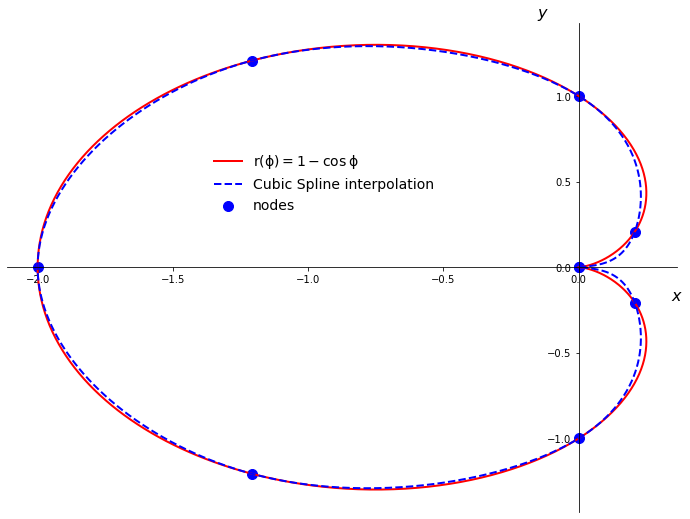

In [16]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

t_range=linspace(0,8,1000)
phi_range = t_range*pi/4
x_predict=[SX(t,t_range[i]) for i in range(len(t_range))]
y_predict=[SY(t,t_range[i]) for i in range(len(t_range))]
x_predcit=array(x_predict)
y_predict=array(y_predict)
plt.figure(figsize=(12,9))
plt.plot(x_t(phi_range), y_t(phi_range), color='red', linewidth=2.0,linestyle='solid', label=r'$\rm r(\phi)=1-\cos{\phi}$')
plt.plot(x_predict, y_predict, color='blue',linewidth=2.0,linestyle='dashed', label=r'Cubic Spline interpolation')
plt.scatter(x_t(phi),y_t(phi),s=100,marker='o',color='blue', label='nodes')

#plt.xlim(-1,1)
#plt.ylim(0,1.1)

#x_ticks=np.linspace(-1,1,21)
#y_ticks=np.linspace(0,1.1,12)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.legend(loc=[0.3,0.6], frameon=False, fontsize=14)

ax=plt.gca()
ax.set_xlabel(r'$x$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$y$', fontsize=16,x=1,y=1,rotation=0)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')

#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)

plt.savefig('HW2-4(c).pdf')
plt.show()